In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### 1. Outputs Overview

In [2]:
# Read the csv file
output = pd.read_csv('../output_analysis.csv', header=None)

# Set names and constants
output.columns = ["Blocked Calls Rate (%)", "Dropped Calls Rate (%)"]
total_runs = 100

In [3]:
output_no_reservation = output.loc[:total_runs - 1].reset_index(drop=True)
output_no_reservation

,Blocked Calls Rate (%),Dropped Calls Rate (%)
0,0.455,0.766
1,0.480,0.794
2,0.440,0.741
3,0.481,0.731
4,0.415,0.739
...,...,...
95,0.449,0.807
96,0.456,0.768
97,0.440,0.771
98,0.425,0.758


In [4]:
output_handover_reservation = output.loc[total_runs:].reset_index(drop=True)
output_handover_reservation

,Blocked Calls Rate (%),Dropped Calls Rate (%)
0,1.386,0.454
1,1.395,0.490
2,1.389,0.472
3,1.443,0.520
4,1.326,0.426
...,...,...
95,1.450,0.462
96,1.364,0.456
97,1.299,0.446
98,1.452,0.503


### 2. Calculate average values and indicate statistical significance

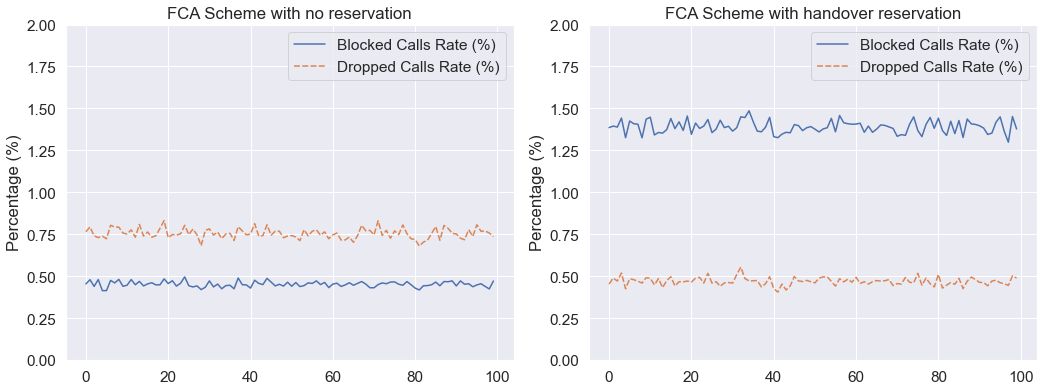

In [5]:
# Set the display
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 6)}, font_scale=1.4)

# Set 2 subplots
fig, axs = plt.subplots(ncols=2)
fig.tight_layout(pad=2.0)

# Plot the simulation outputs for both 2 FCA schemes
sns.lineplot(data=output_no_reservation, ax=axs[0]) \
    .set(ylabel="Percentage (%)", ylim=(0, 2), title="FCA Scheme with no reservation")
sns.lineplot(data=output_handover_reservation, ax=axs[1]) \
    .set(ylabel="Percentage (%)", ylim=(0, 2), title="FCA Scheme with handover reservation")

plt.show()

In [6]:
blocked_rate_no_reservation = output_no_reservation['Blocked Calls Rate (%)']
dropped_rate_no_reservation = output_no_reservation['Dropped Calls Rate (%)']

print("FCA SCHEME WITH NO RESERVATION")

print("-----Blocked Calls Rate (%)-----")
print("Mean: {:f}".format(blocked_rate_no_reservation.mean()))
print("Standard Deviation: {:f}".format(blocked_rate_no_reservation.std(ddof=1)))

print("-----Dropped Calls Rate (%)-----")
print("Mean: {:f}".format(dropped_rate_no_reservation.mean()))
print("Standard Deviation: {:f}".format(dropped_rate_no_reservation.std(ddof=1)))

FCA SCHEME WITH NO RESERVATION
-----Blocked Calls Rate (%)-----
Mean: 0.453340
Standard Deviation: 0.016858
-----Dropped Calls Rate (%)-----
Mean: 0.755570
Standard Deviation: 0.030646


In [7]:
blocked_rate_handover_reservation = output_handover_reservation['Blocked Calls Rate (%)']
dropped_rate_handover_reservation = output_handover_reservation['Dropped Calls Rate (%)']

print("FCA SCHEME WITH HANDOVER RESERVATION")

print("-----Blocked Calls Rate (%)-----")
print("Mean: {:f}".format(blocked_rate_handover_reservation.mean()))
print("Standard Deviation: {:f}".format(blocked_rate_handover_reservation.std(ddof=1)))

print("-----Dropped Calls Rate (%)-----")
print("Mean: {:f}".format(dropped_rate_handover_reservation.mean()))
print("Standard Deviation: {:f}".format(dropped_rate_handover_reservation.std(ddof=1)))

FCA SCHEME WITH HANDOVER RESERVATION
-----Blocked Calls Rate (%)-----
Mean: 1.390140
Standard Deviation: 0.038146
-----Dropped Calls Rate (%)-----
Mean: 0.469810
Standard Deviation: 0.023993


### 3. Output Analysis

In [8]:
t = 1.66
n = 100

print("FCA SCHEME WITH NO RESERVATION")

print("-----Blocked Calls Rate (%)-----")
mean1 = blocked_rate_no_reservation.mean()
std1 = blocked_rate_no_reservation.std(ddof=1)
delta1 = t*std1/(math.sqrt(n))
print("Delta: {:f}".format(delta1))
print("90% confidence interval: [{:f}, {:f}]" \
      .format(mean1 - delta1, mean1 + delta1))

print("-----Dropped Calls Rate (%)-----")
mean2 = dropped_rate_no_reservation.mean()
std2 = dropped_rate_no_reservation.std(ddof=1)
delta2 = t*std2/(math.sqrt(n))
print("Delta: {:f}".format(delta2))
print("90% confidence interval: [{:f}, {:f}]" \
      .format(mean2 - delta2, mean2 + delta2))

FCA SCHEME WITH NO RESERVATION
-----Blocked Calls Rate (%)-----
Delta: 0.002798
90% confidence interval: [0.450542, 0.456138]
-----Dropped Calls Rate (%)-----
Delta: 0.005087
90% confidence interval: [0.750483, 0.760657]


In [9]:
t = 1.66
n = 100

print("FCA SCHEME WITH HANDOVER RESERVATION")

print("-----Blocked Calls Rate (%)-----")
mean3 = blocked_rate_handover_reservation.mean()
std3 = blocked_rate_handover_reservation.std(ddof=1)
delta3 = t*std3/(math.sqrt(n))
print("Delta: {:f}".format(delta3))
print("90% confidence interval: [{:f}, {:f}]" \
      .format(mean3 - delta3, mean3 + delta3))

print("-----Dropped Calls Rate (%)-----")
mean4 = dropped_rate_handover_reservation.mean()
std4 = dropped_rate_handover_reservation.std(ddof=1)
delta4 = t*std4/(math.sqrt(n))
print("Delta: {:f}".format(delta4))
print("90% confidence interval: [{:f}, {:f}]" \
      .format(mean4 -delta4, mean4 + delta4))

FCA SCHEME WITH HANDOVER RESERVATION
-----Blocked Calls Rate (%)-----
Delta: 0.006332
90% confidence interval: [1.383808, 1.396472]
-----Dropped Calls Rate (%)-----
Delta: 0.003983
90% confidence interval: [0.465827, 0.473793]
